<h1>Project: United Kingdom Road Accident Data Analysis</h1>

<h3>Inclusive Years:2019-2022</h3>

<h4>Analyst: Jamaica M. Loria</h4>

<h1>Importing Libraries / Data Preparation</h1>

In [18]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [19]:
accident = pd.read_csv('dataset\\accident_data.csv')

In [20]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>Data Cleansing / Filling Up Missing Values in the Data Frame</h1>

In [21]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [22]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unaccounted')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')


In [23]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [24]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')
accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

<h1>Categorical Data Fields</h1>

In [25]:
accident['Index'] = accident['Index'].astype('category')
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Latitude'] = accident['Latitude'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [26]:
accident.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

In [27]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>Extracting Information using pandas Date Time</h1>

In [28]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek
accident['Daylight'] = accident['Light_Conditions'].str.contains('Daylight')

In [29]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
Daylight                   0
dtype: int64

<h1>INSIGHT 1</h1>

<h1>1.What Area has the Highest number of Accidents?</h1>

In [30]:
area_severity = accident['Urban_or_Rural_Area'].value_counts()
area_severity

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h3>Insight 1.1: Based on the result, 63.83% of accidents happened in Urban Area</h3>

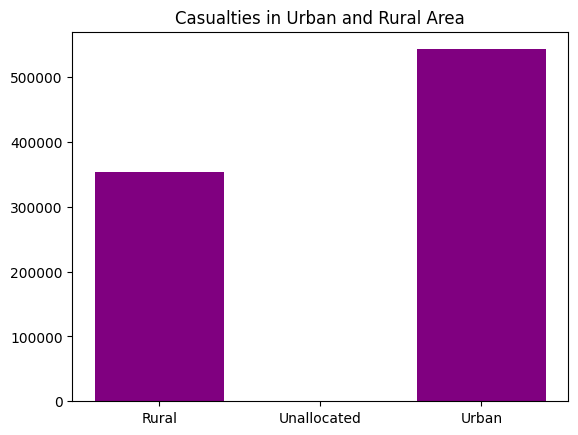

In [31]:
visual1 = accident.groupby(['Urban_or_Rural_Area'])['Number_of_Casualties'].sum().reset_index()
x = visual1['Urban_or_Rural_Area']
y = visual1['Number_of_Casualties']
plt.bar(x, y, color='purple')
plt.title('Casualties in Urban and Rural Area')
plt.show()

<h1>INSIGHT 2</h1>

<h1>2.What Severity Level has the Highest Amount of Accidents?</h1>

In [32]:
severity_counts = accident['Accident_Severity'].value_counts()
severity_counts

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h3>Insight 2.1: Based on the result, 85.34% of accidents has Slight Severity</h3>

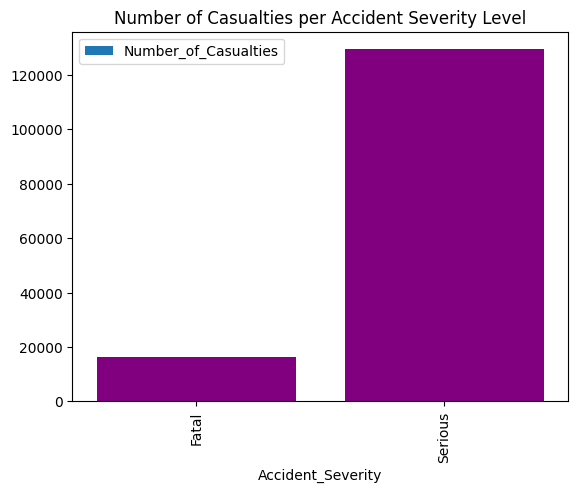

In [38]:
visual2 = accident.groupby(['Accident_Severity'])['Number_of_Casualties'].sum().reset_index()
visual2 = visual2[visual2['Accident_Severity'] != 'Slight']
visual2.plot(kind='bar', x='Accident_Severity', y='Number_of_Casualties')
x = visual2['Accident_Severity']
y = visual2['Number_of_Casualties']
plt.title('Number of Casualties per Accident Severity Level')
plt.bar(x, y, color='purple')  # Changed the bar color to purple
plt.show()

<h1>INSIGHT 3</h1>

<h1>3. How many incidents happened in an Urban or Rural Area in the Year 2019 </h1>

In [ ]:
year_2019 = accident[accident['Year']== 2019]
year_2019['Urban_or_Rural_Area'].value_counts().sum()

182115

<h3>Insight 3.1: There is a total number of 182, 115 incidents that happend in a Urban or Rural Area in the year 2019</h3>

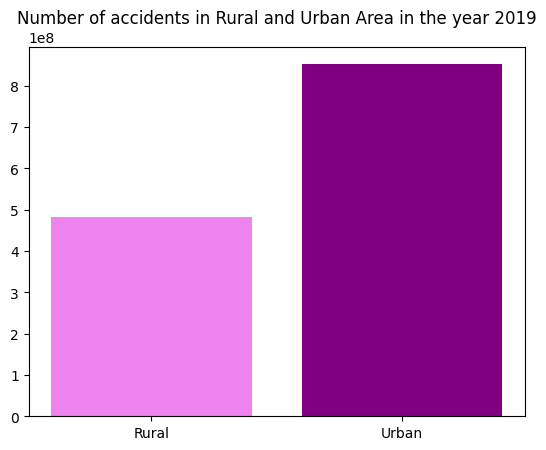

In [36]:
visual3 = accident.groupby(['Urban_or_Rural_Area'])['Year'].sum().reset_index()
visual3 = visual3[visual3['Urban_or_Rural_Area'] != 'Unallocated']

x = visual3['Urban_or_Rural_Area']
y = visual3['Year']
plt.title('Number of accidents in Rural and Urban Area in the year 2019')

# Create bar plot with purple color gradient
colors = ['violet', 'purple']  # Light purple to medium purple
plt.bar(x, y, color=colors)

plt.show()

<h1>INSIGHT 4</h1>

<h1>4. What vehicle type causes the most and least accident?</h1>

In [ ]:
accident.groupby('Vehicle_Type')['Number_of_Casualties'].sum().sort_values(ascending=False)

Vehicle_Type
Car                                      676692
Van / Goods 3.5 tonnes mgw or under       46271
Bus or coach (17 or more pass seats)      34915
Motorcycle over 500cc                     34879
Goods 7.5 tonnes mgw and over             23397
Motorcycle 125cc and under                20348
Taxi/Private hire car                     18195
Motorcycle over 125cc and up to 500cc     10286
Motorcycle 50cc and under                 10167
Goods over 3.5t. and under 7.5t            8308
Other vehicle                              7554
Minibus (8 - 16 passenger seats)           2659
Agricultural vehicle                       2613
Pedal cycle                                 270
Data missing or out of range                  9
Ridden horse                                  5
Name: Number_of_Casualties, dtype: int64

<h3>Insight 4.1: 102.42% of cars causes the most casualties while 0.0008% of ridden horse causes the least casualties</h3>

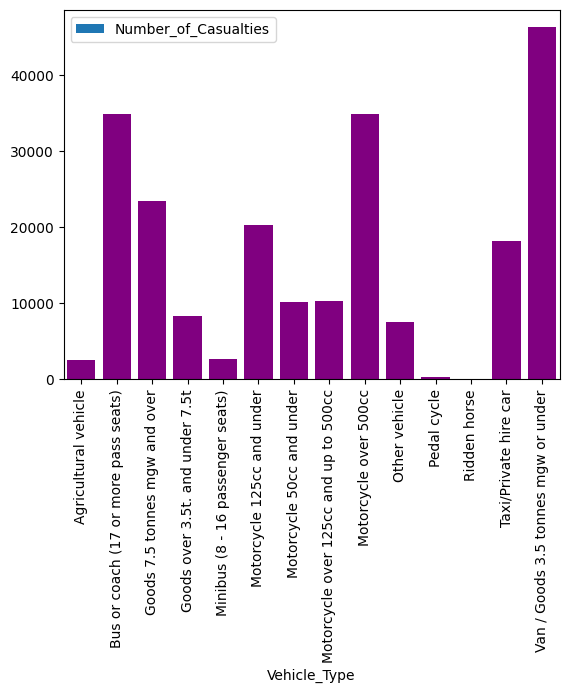

In [40]:
visual4 = accident.groupby(['Vehicle_Type'])['Number_of_Casualties'].sum().reset_index()
visual4 = visual4[visual4['Vehicle_Type'] != 'Car']
visual4 = visual4[visual4['Vehicle_Type'] != 'Data missing or out of range']

visual4.plot(kind='bar', x='Vehicle_Type', y='Number_of_Casualties')
x = visual4['Vehicle_Type']
y = visual4['Number_of_Casualties']
plt.title('')
plt.bar(x, y, color='purple')  # Changed bar color to purple
plt.show()

<h1>INSIGHT 5</h1>

<h1>5. How many Car accidents happened in a Fine no high winds weather conditions</h1>

In [ ]:
accident[(accident['Vehicle_Type'] == 'Car') & (accident['Weather_Conditions'] == 'Fine no high winds')].info()

<class 'pandas.core.frame.DataFrame'>
Index: 392668 entries, 0 to 660676
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    392668 non-null  category      
 1   Accident_Severity        392668 non-null  category      
 2   Accident Date            392668 non-null  datetime64[ns]
 3   Latitude                 392668 non-null  category      
 4   Light_Conditions         392668 non-null  category      
 5   District Area            392668 non-null  category      
 6   Longitude                392668 non-null  category      
 7   Number_of_Casualties     392668 non-null  int64         
 8   Number_of_Vehicles       392668 non-null  int64         
 9   Road_Surface_Conditions  392668 non-null  category      
 10  Road_Type                392668 non-null  category      
 11  Urban_or_Rural_Area      392668 non-null  category      
 12  Weather_Conditions   

<h3>Insight 5.1: There are approximately 59.43% car accident in a fine no high winds weather conditions</h3>

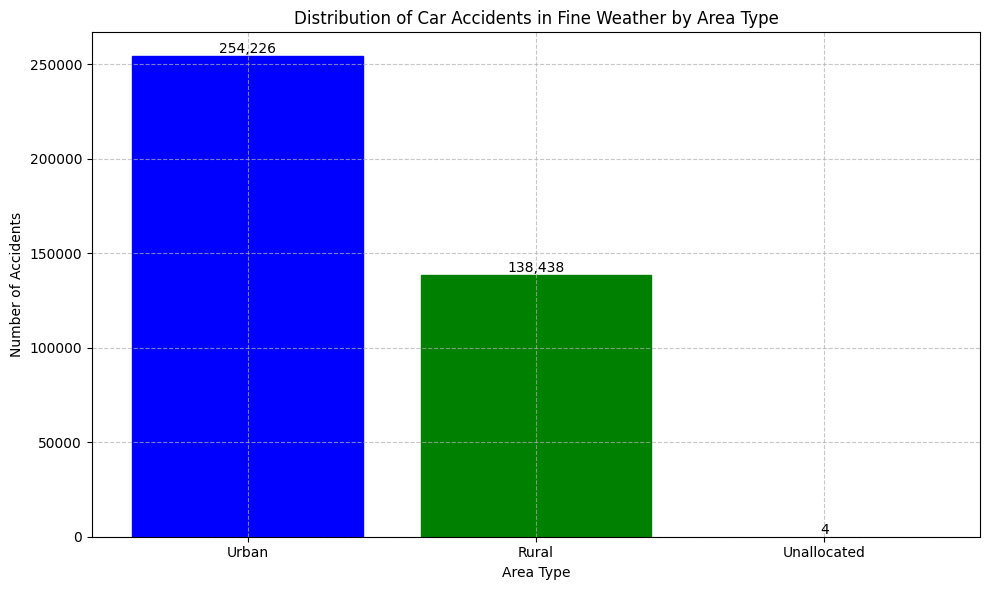

In [41]:
# Filter data for cars in fine weather and group by Urban/Rural area
car_fine_weather = accident[(accident['Vehicle_Type'] == 'Car') & 
                           (accident['Weather_Conditions'] == 'Fine no high winds')]
area_distribution = car_fine_weather['Urban_or_Rural_Area'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(area_distribution.index, area_distribution.values)

# Set colors - Urban (blue) and Rural (green)
colors = ['blue', 'green']
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.title('Distribution of Car Accidents in Fine Weather by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Number of Accidents')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1>INSIGHT 6</h1>

<h1>6. What year has the most casualties by accidents?</h1>

In [ ]:
accident.groupby('Year')['Number_of_Casualties'].sum().sort_values(ascending=False)

Year
2019    247780
2020    230905
2021    222146
2022    195737
Name: Number_of_Casualties, dtype: int64

<h3>Insight 6.1: Year 2019 has the most casualties with a total number of 247,780 accident</h3>

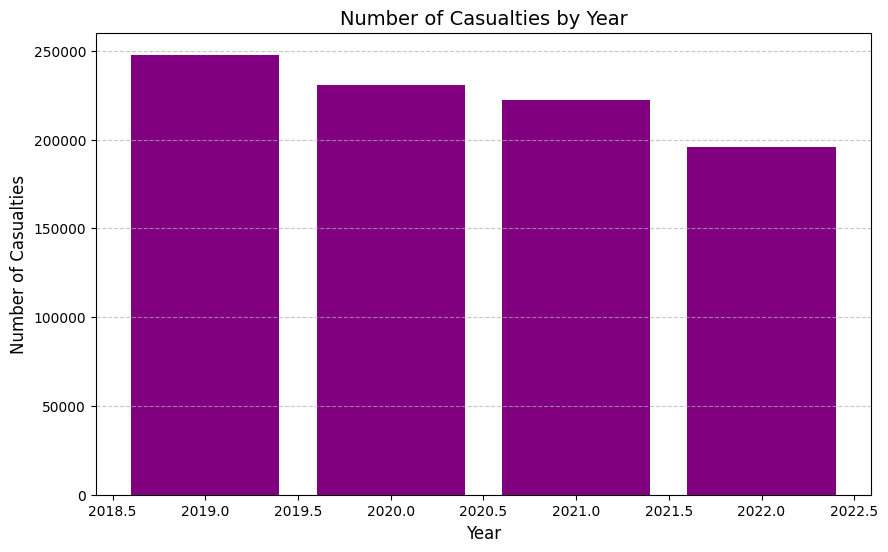

In [43]:
visual6 = accident.groupby(['Year'])['Number_of_Casualties'].sum().reset_index()
x = visual6['Year']
y = visual6['Number_of_Casualties']
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='purple')
plt.title('Number of Casualties by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Casualties', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h1>INSIGHT 7</h1>

<h1>7. What Month has the most casualties by accidents?</h1>

In [ ]:
accident.groupby('Month')['Number_of_Casualties'].sum().sort_values(ascending=False)

Month
11    81453
10    80302
7     78490
5     76796
6     76296
9     76053
8     75280
3     73076
1     71038
12    70651
4     70620
2     66513
Name: Number_of_Casualties, dtype: int64

<h3>Insight 7.1: The month of November has the most casualties with a total number of 81,453 accident</h3>

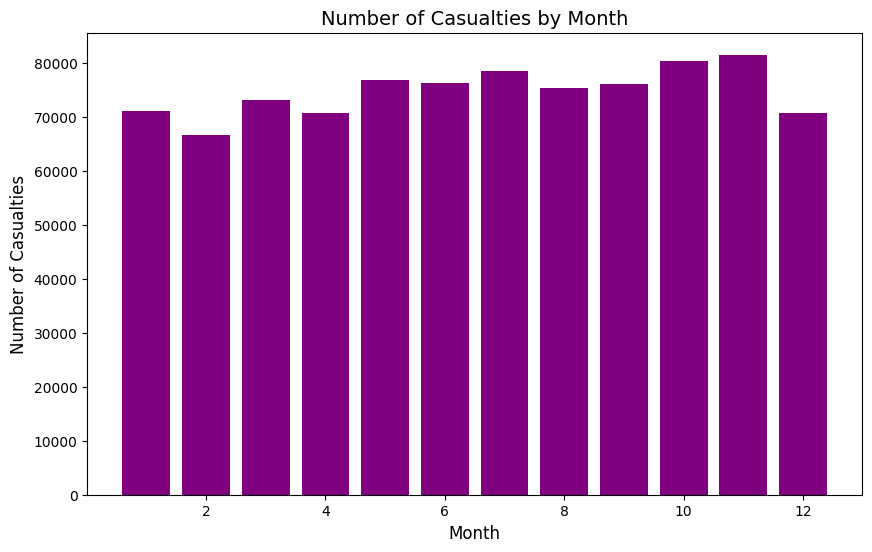

In [44]:
visual7 = accident.groupby(['Month'])['Number_of_Casualties'].sum().reset_index()
x = visual7['Month']
y = visual7['Number_of_Casualties']

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='purple')
plt.title('Number of Casualties by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Casualties', fontsize=12)
plt.show()

<h1>INSIGHT 8</h1>

<h1>8. Is their any correlation between Number of Vehicles and the Number of Casualties?</h1>

In [46]:
insight_one = accident['Number_of_Vehicles'].corr(accident['Number_of_Casualties'])
insight_one

0.22888886126927557

<h3>Insight 8.1: No, there is no correlation between the total number of vehicles and number of casualties</h3>

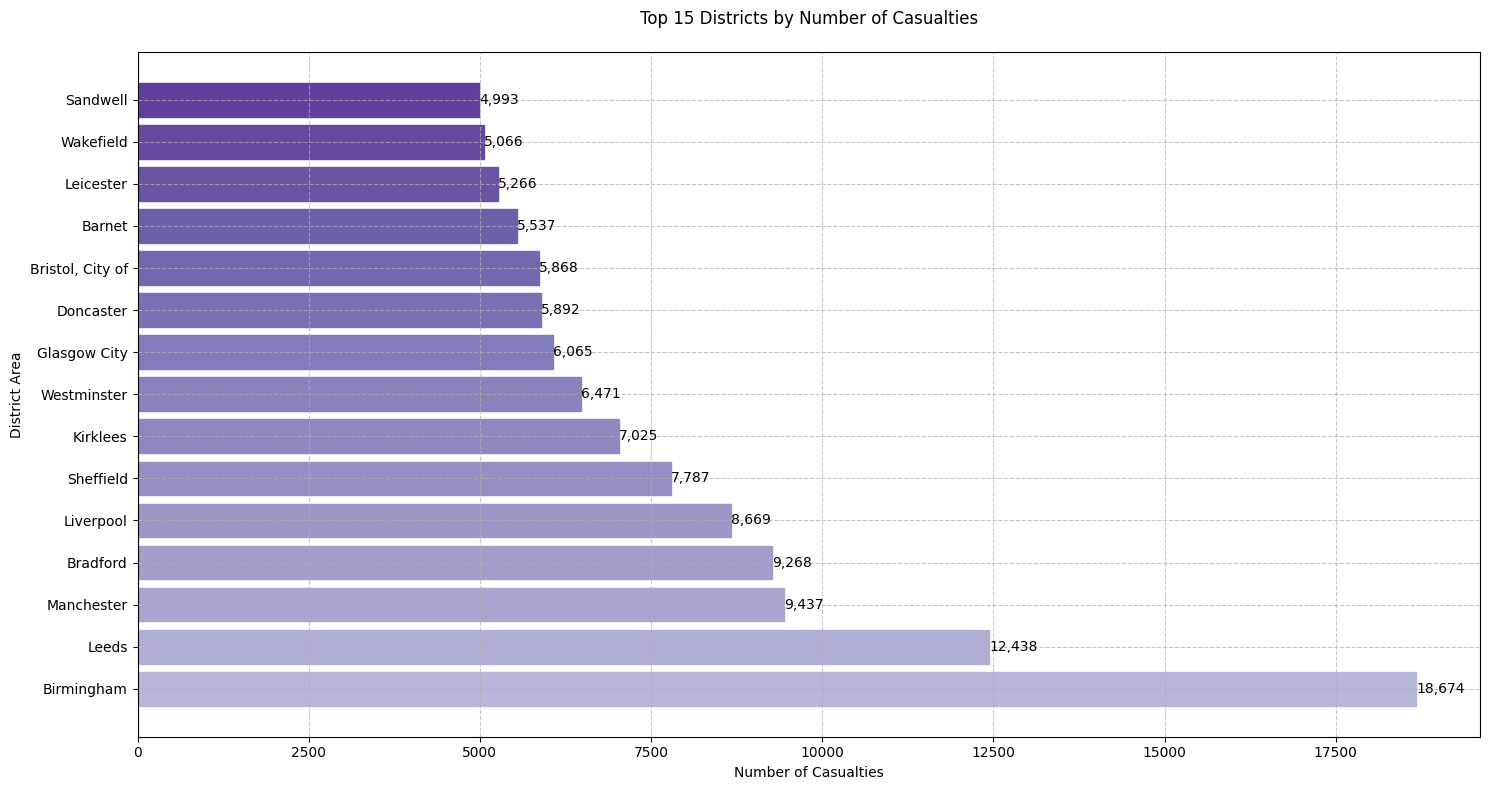

In [50]:
# Get top 15 districts by casualties
district_casualties = accident.groupby('District Area')['Number_of_Casualties'].sum().sort_values(ascending=False)
top_15_districts = district_casualties.head(15)

plt.figure(figsize=(15, 8))

# Create horizontal bar chart
bars = plt.barh(top_15_districts.index, top_15_districts.values)

# Color gradient using purples
colors = plt.cm.Purples(np.linspace(0.4, 0.8, len(bars)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.title('Top 15 Districts by Number of Casualties', pad=20)
plt.xlabel('Number of Casualties')
plt.ylabel('District Area')

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}',
             ha='left', va='center', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1>INSIGHT 9</h1>

<h1>9. What District causes the most accidents?</h1>

In [ ]:
accident.groupby('District Area')['Number_of_Casualties'].sum().sort_values(ascending=False)

District Area
Birmingham                   18674
Leeds                        12438
Manchester                    9437
Bradford                      9268
Liverpool                     8669
                             ...  
London Airport (Heathrow)      217
Clackmannshire                 204
Shetland Islands               202
Orkney Islands                 154
Clackmannanshire               115
Name: Number_of_Casualties, Length: 422, dtype: int64

<h3>Insight 9.1: The District Area of Birminghan has cost the most deaths</h3>

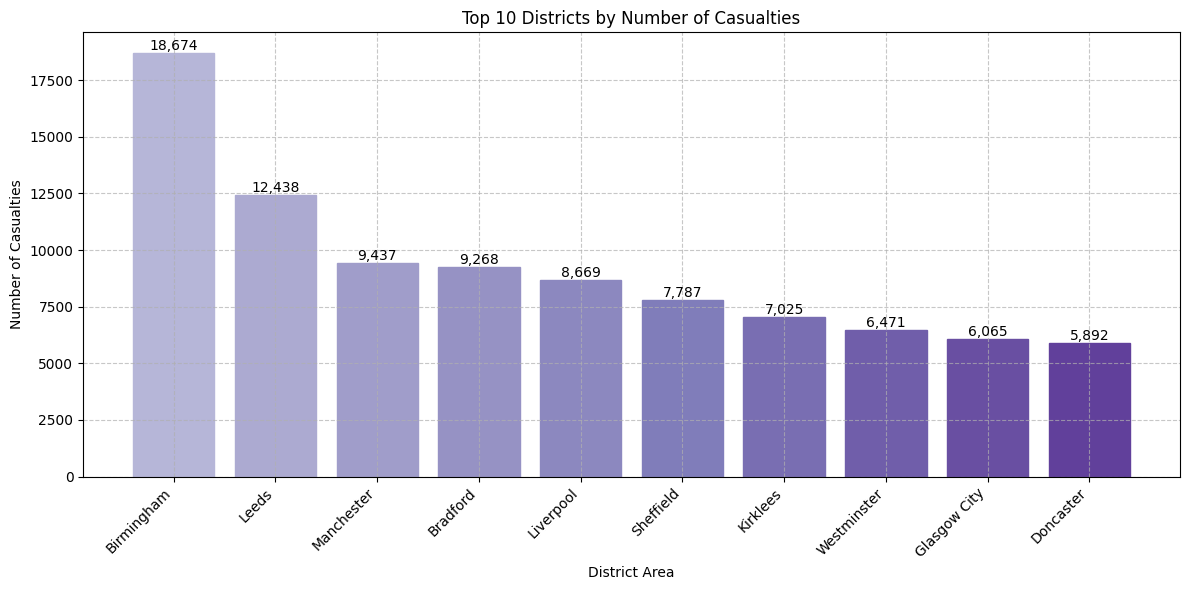

In [51]:
# Get top 10 districts by casualties
district_casualties = accident.groupby('District Area')['Number_of_Casualties'].sum().sort_values(ascending=False)
top_10_districts = district_casualties.head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_districts.index, top_10_districts.values)

# Color scheme
colors = plt.cm.Purples(np.linspace(0.4, 0.8, len(bars)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.title('Top 10 Districts by Number of Casualties')
plt.xlabel('District Area')
plt.ylabel('Number of Casualties')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1>INSIGHT 10</h1>

<h1>10. How many casualties happen in Daylight?</h1>

In [ ]:
accident.groupby('Daylight')['Number_of_Casualties'].sum().sort_values(ascending=False)

Daylight
True     649889
False    246679
Name: Number_of_Casualties, dtype: int64

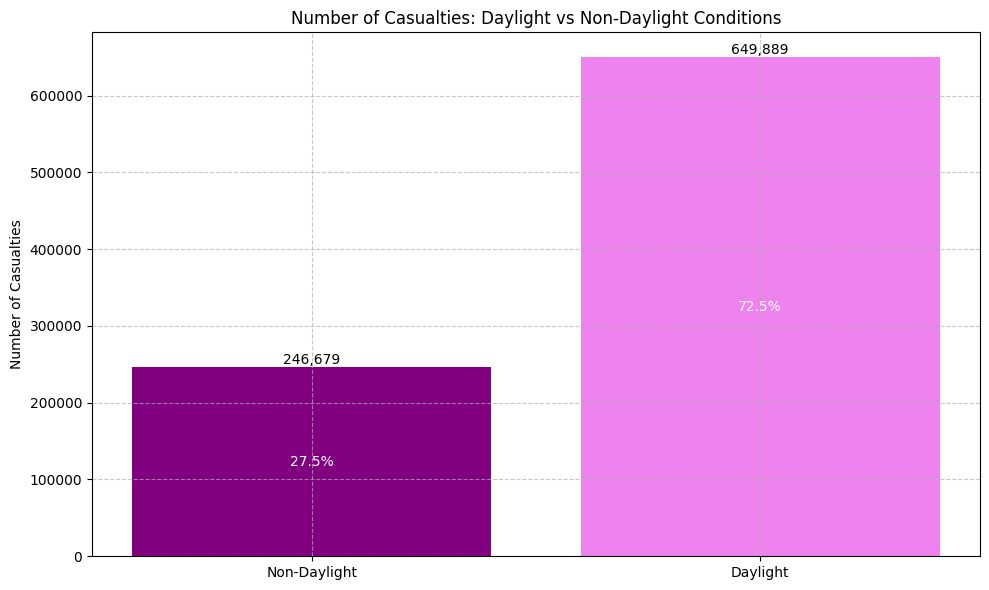

In [53]:
# Get casualties by daylight condition
daylight_casualties = accident.groupby('Daylight')['Number_of_Casualties'].sum()

plt.figure(figsize=(10, 6))
bars = plt.bar(['Non-Daylight', 'Daylight'], 
               [daylight_casualties[False], daylight_casualties[True]], 
               color=['purple', 'violet'])

plt.title('Number of Casualties: Daylight vs Non-Daylight Conditions')
plt.ylabel('Number of Casualties')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

# Add percentage labels
total_casualties = daylight_casualties.sum()
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_casualties) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height/2,
             f'{percentage:.1f}%',
             ha='center', va='center',
             color='white' if bar.get_height() > 100000 else 'black')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3>Insight 10.1: Approximately 98.37% of the accidents happened in Daylight Condition </h3>

<h1>INSIGHT 11</h1>

<h1>11. How many vehicles cause each severity level</h1

In [ ]:
accident.groupby('Accident_Severity')['Number_of_Vehicles'].count()

Accident_Severity
Fatal        8661
Serious     88217
Slight     563801
Name: Number_of_Vehicles, dtype: int64

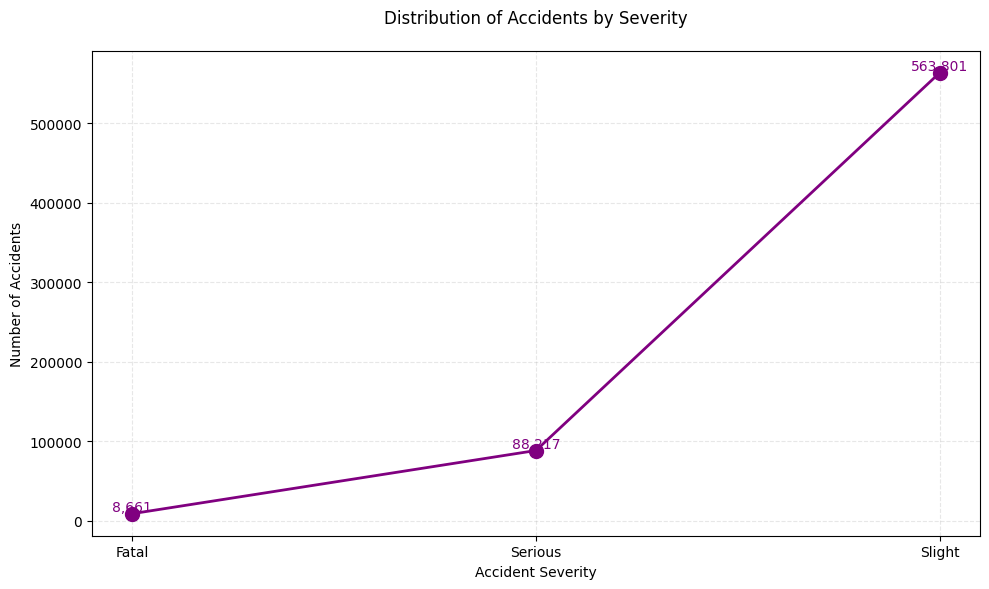

In [56]:
# Get accident counts by severity
severity_counts = accident.groupby('Accident_Severity')['Number_of_Vehicles'].count()

plt.figure(figsize=(10, 6))

# Create line plot with purple color
plt.plot(severity_counts.index, severity_counts.values, 
         color='purple',
         marker='o',  # Add markers at data points
         linewidth=2,
         markersize=10)

plt.title('Distribution of Accidents by Severity', pad=20)
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')

# Add value labels above each point
for i, v in enumerate(severity_counts.values):
    plt.text(i, v, f'{v:,}', 
             ha='center', va='bottom',
             color='purple')

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

<h3>Insight 11.1: There happens to be 1.31% vehicles that has caused fatal severity, 13.35% caused serious severity, and 85.34% caused slight severity</h3>

<h1>INSIGHT 12</h1>

<h1>12. What type of Road causes the most casualties</h1>

In [ ]:
accident.groupby('Road_Type')['Number_of_Casualties'].count()

<h3>Insight 12.1: Single carriageway showed the highest number of accident with 74.49% of casualties </h3>

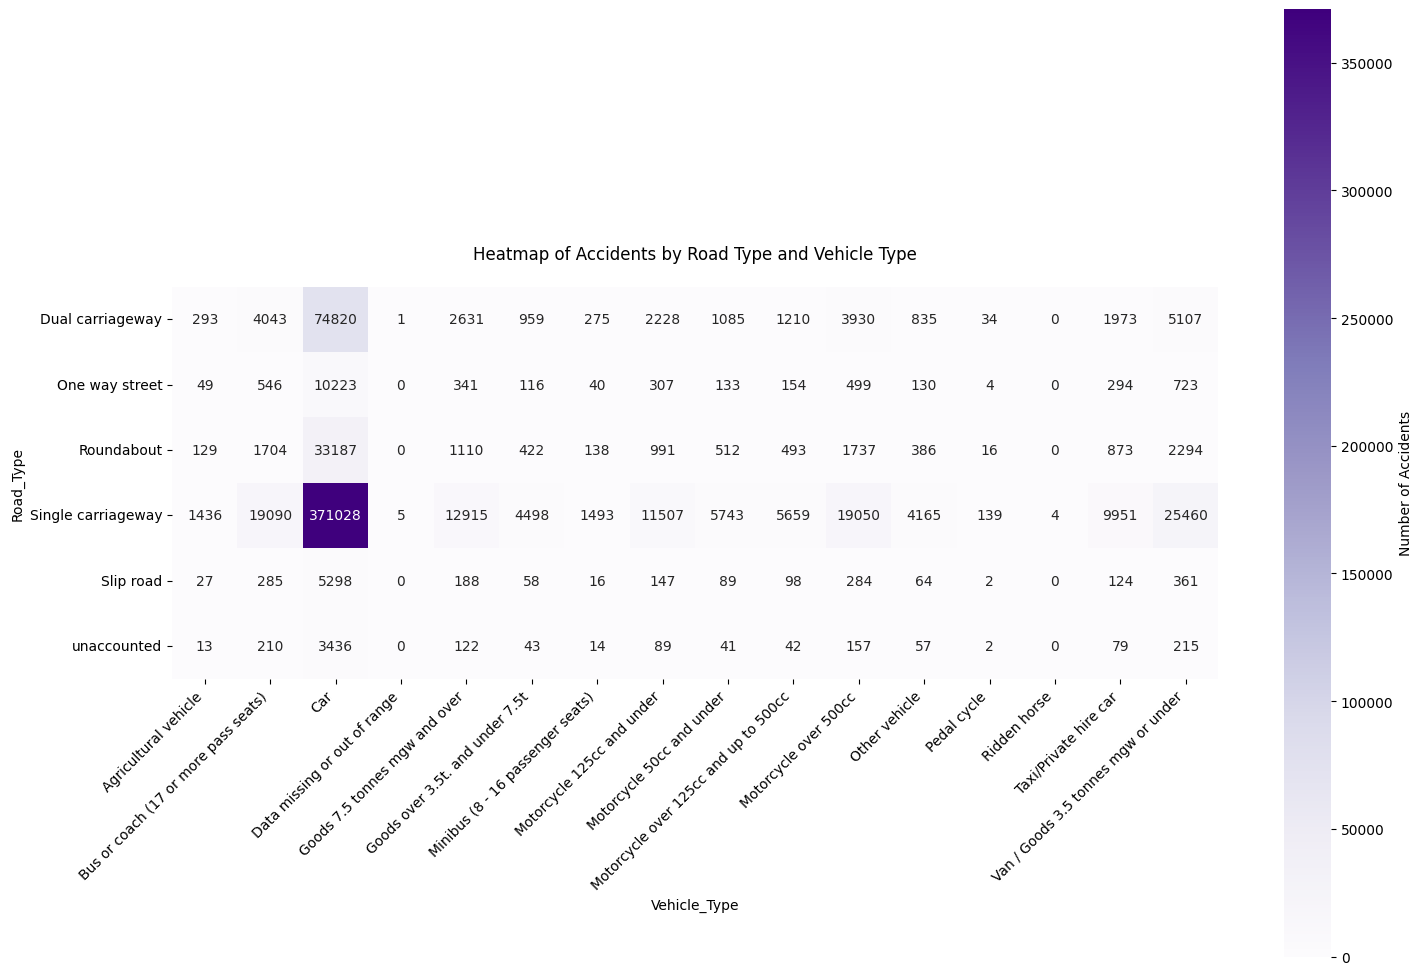

In [58]:
# Create the cross-tabulation
type_vh = accident.groupby(['Road_Type', 'Vehicle_Type']).size().unstack(fill_value=0)

# Create a figure with larger size
plt.figure(figsize=(15, 10))

# Create heatmap with improved styling
sns.heatmap(type_vh, 
            cmap='Purples',  # Purple color scheme
            annot=True,     # Show numbers in cells
            fmt='g',        # Format as general number
            cbar_kws={'label': 'Number of Accidents'},
            square=True)    # Make cells square

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add title and adjust layout
plt.title('Heatmap of Accidents by Road Type and Vehicle Type', pad=20)
plt.tight_layout()

plt.show()

<h1>INSIGHT 13</h1>

<h1>13. Is there any correlation between number of vehicles and number of casualties</h1>

In [59]:
vehicle_casualties = accident ['Number_of_Casualties'].corr(accident['Number_of_Vehicles'])
vehicle_casualties

0.2288888612692756

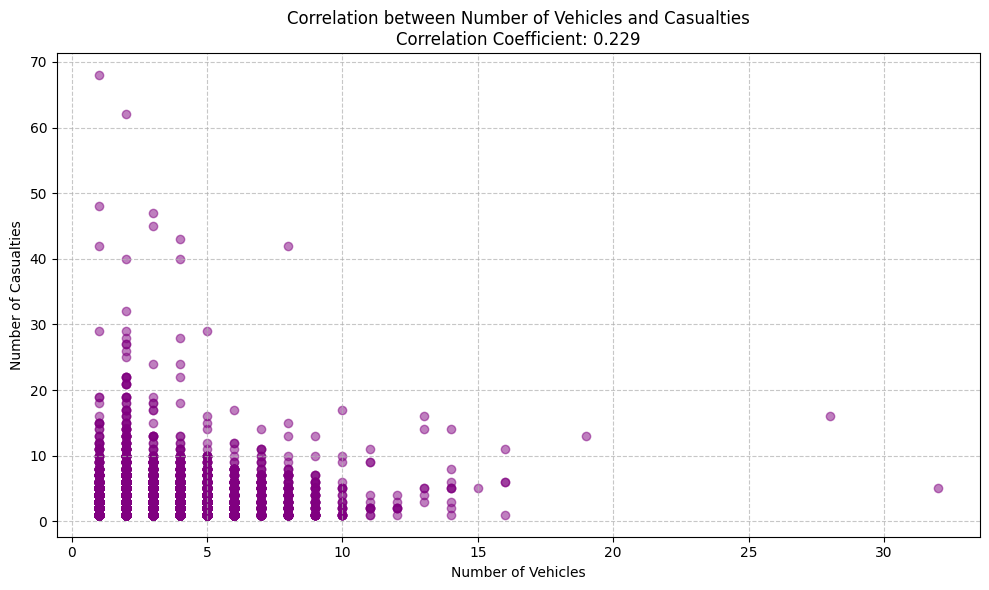

In [62]:
plt.figure(figsize=(10, 6))

# Create scatter plot
plt.scatter(accident['Number_of_Vehicles'], 
           accident['Number_of_Casualties'],
           alpha=0.5,
           c='purple')

# Add title and labels
plt.title(f'Correlation between Number of Vehicles and Casualties\nCorrelation Coefficient: {vehicle_casualties:.3f}')
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Casualties')

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<h3>Insight 13.1: There is no Correlation between number of vehicles and number of casualties</h3>

<h1>Insight 14</h1>

<h1>14. Is there any correlation between Latitude and Number of Casualties</h1>

In [63]:
latitude_casualties = accident ['Latitude'].corr(accident['Number_of_Casualties'])
latitude_casualties

0.03220129464996809

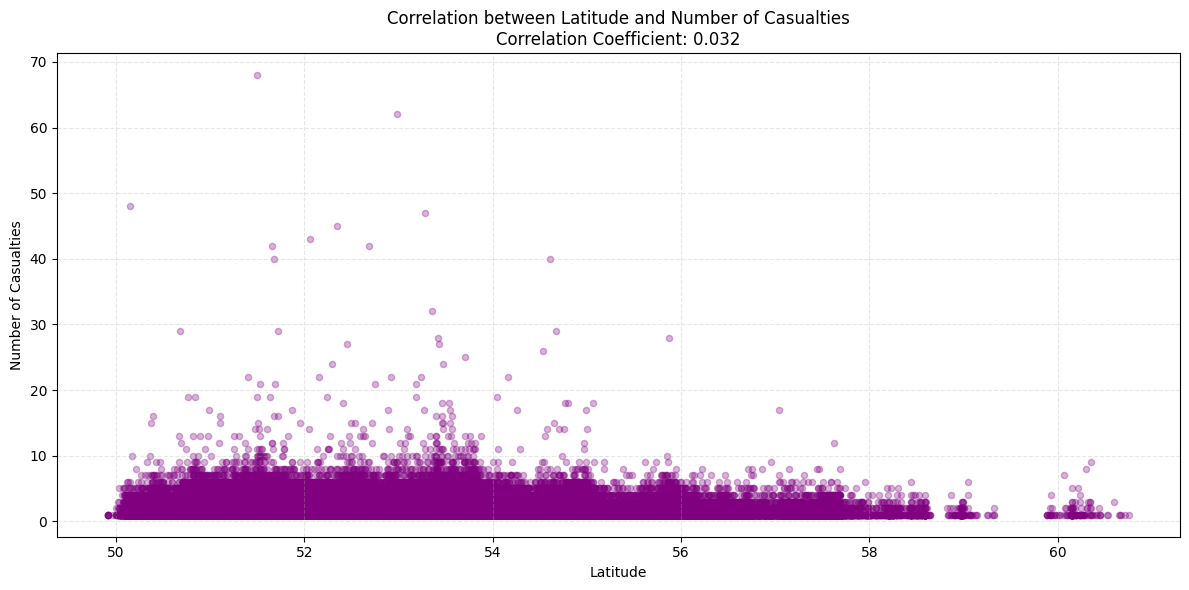

In [65]:
plt.figure(figsize=(12, 6))

# Convert Latitude back to numeric type for plotting
accident['Latitude'] = accident['Latitude'].astype(float)

# Create scatter plot
plt.scatter(accident['Latitude'], 
           accident['Number_of_Casualties'],
           alpha=0.3,  # Add transparency
           c='purple',  # Red color for casualties
           s=20)  # Point size

# Add title and labels
plt.title(f'Correlation between Latitude and Number of Casualties\nCorrelation Coefficient: {latitude_casualties:.3f}')
plt.xlabel('Latitude')
plt.ylabel('Number of Casualties')

# Add grid
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

<h3>Insight 14.1: There is no Correlation between Latitude and Number of Casualties</h3>

<h1>INSIGHT 15</h1>

<h1>14. Is there any correlation between Longitude and Number of Casualties</h1>

In [66]:
longitude_casualties = accident ['Longitude'].corr(accident['Number_of_Casualties'])
longitude_casualties

-0.04040873919498823

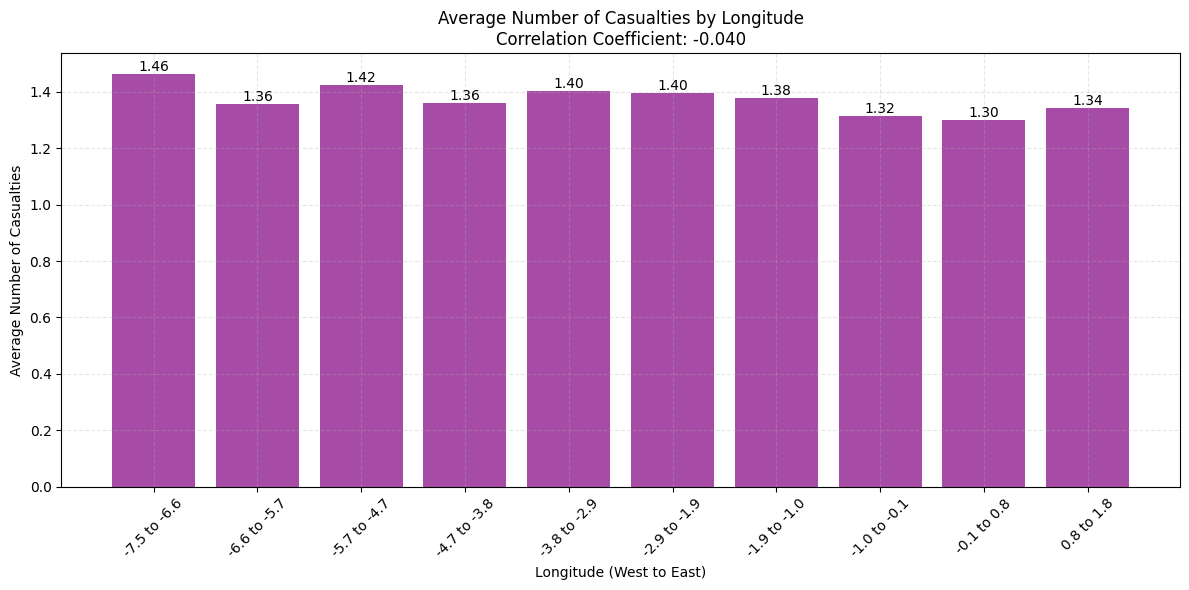

In [67]:
# Convert Longitude back to numeric for analysis
accident['Longitude'] = accident['Longitude'].astype(float)

# Create longitude bins for better visualization
accident['Longitude_Bins'] = pd.cut(accident['Longitude'], bins=10)
avg_casualties = accident.groupby('Longitude_Bins')['Number_of_Casualties'].mean()

plt.figure(figsize=(12, 6))

# Create bar plot
bars = plt.bar(range(len(avg_casualties)), 
               avg_casualties.values,
               color='purple',
               alpha=0.7)

# Customize the plot
plt.title(f'Average Number of Casualties by Longitude\nCorrelation Coefficient: {longitude_casualties:.3f}')
plt.xlabel('Longitude (West to East)')
plt.ylabel('Average Number of Casualties')

# Format x-axis labels
plt.xticks(range(len(avg_casualties)), 
           [f'{interval.left:.1f} to {interval.right:.1f}' for interval in avg_casualties.index],
           rotation=45)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

<h3>Insight 15.1: There is no Correlation between Longitude and Number of Casualties</h3>

<h1>INSIGHT 16</h1>

<h1>16. What Road Surface Conditions does accident occur frequently?</h1>

In [ ]:
accident['Road_Surface_Conditions'].value_counts()

<h3>Insight 16.1: Based on the result, 67.78% of accident occur frequently in a Dry Road Surface Conditions</h3>

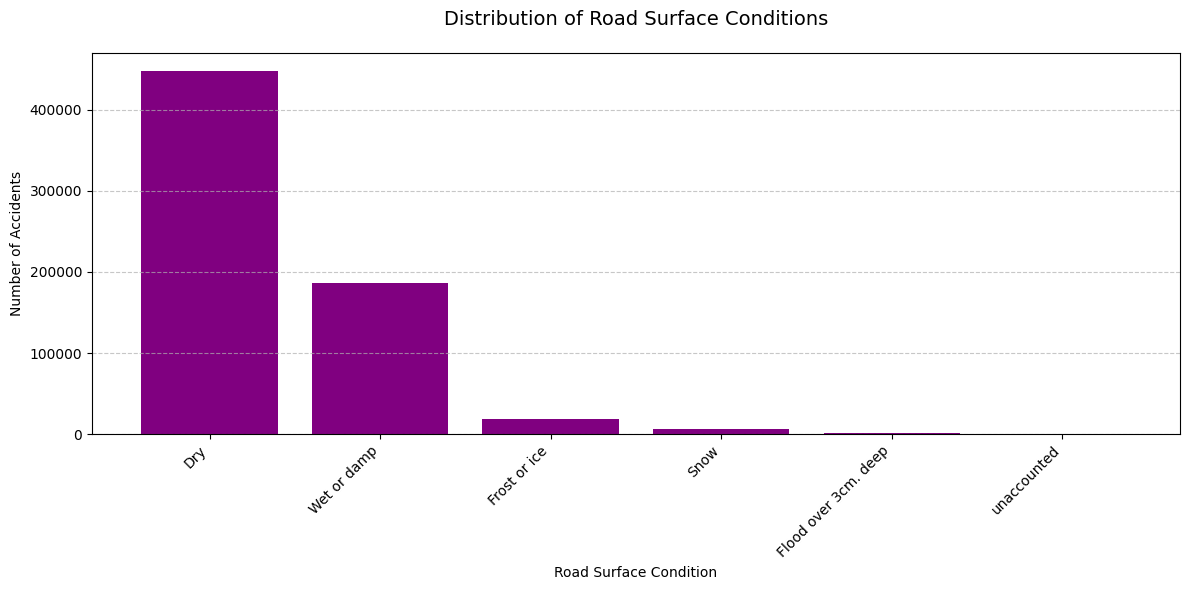

In [73]:
# Create figure with larger size
plt.figure(figsize=(12, 6))

# Get value counts and create bar plot
surface_counts = accident['Road_Surface_Conditions'].value_counts()

# Create bar plot with custom colors
colors = ['purple']
bars = plt.bar(range(len(surface_counts)), surface_counts.values, color=colors)

# Customize the plot
plt.title('Distribution of Road Surface Conditions', pad=20, size=14)
plt.xlabel('Road Surface Condition')
plt.ylabel('Number of Accidents')

# Rotate x-axis labels for better readability
plt.xticks(range(len(surface_counts)), surface_counts.index, rotation=45, ha='right')

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<h1>INSIGHT 17</h1>

<h1>17. Is there any correlation between the Urban or Rural Area and Number of vehicles?</h1>

In [ ]:
f_stats, p_value = f_oneway(accident[accident['Urban_or_Rural_Area'] == 'Urban']['Number_of_Vehicles'],
                            accident[accident['Urban_or_Rural_Area'] == 'Rural']['Number_of_Vehicles'])
print(p_value)

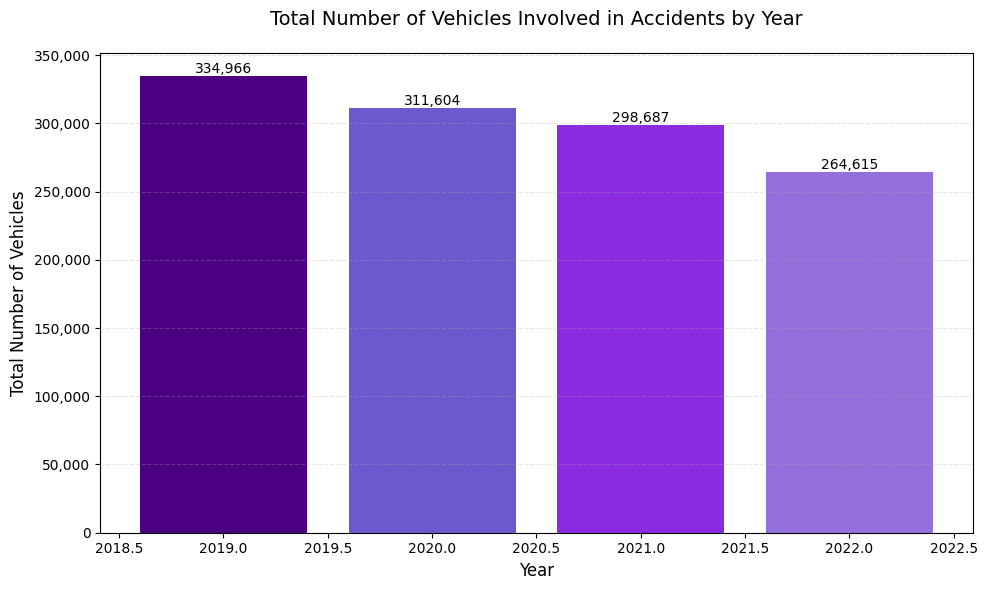

In [89]:
# Get data for visualization
yearly_vehicles = accident.groupby('Year')['Number_of_Vehicles'].sum().sort_values(ascending=False)

# Create figure
plt.figure(figsize=(10, 6))

# Create bar plot with custom colors
bars = plt.bar(yearly_vehicles.index, yearly_vehicles.values, 
               color=['#4B0082', '#6A5ACD', '#8A2BE2', '#9370DB'])  # Purple color scheme

# Customize the plot
plt.title('Total Number of Vehicles Involved in Accidents by Year', pad=20, size=14)
plt.xlabel('Year', size=12)
plt.ylabel('Total Number of Vehicles', size=12)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.3)

# Format y-axis with comma separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

<h3>Insight 17.1: Using the one way anova, analysis of variance, there is a correlation between the null value of Urban or Rural Area and Number of vehicles</h3>


<h1>INSIGHT 18</h1>

<h1>18. In what year has the most number of vehicles?</h1>

In [ ]:
accident.groupby('Year')['Number_of_Vehicles'].sum().sort_values(ascending=False)

<h3>Insight 18.1: Year 2019 has the most number of vehicles with an estimation of 50.70% vehicles</h3>

<h1>INSIGHT 19</h1>

<h1>19. Is their any correlation between Number of Vehicles and in each category of Accident Severity? </h1>

In [90]:
slight_corr = accident[(accident['Accident_Severity'] == 'Slight')]['Number_of_Vehicles'].corr (accident[(accident['Accident_Severity'] == 'Slight')]['Number_of_Vehicles'])
print (f'Slight: {slight_corr}')

serious_corr = accident[(accident['Accident_Severity'] == 'Serious')]['Number_of_Vehicles'].corr (accident[(accident['Accident_Severity'] == 'Serious')]['Number_of_Vehicles'])
print (f'Serious: {serious_corr}')

fatal_corr = accident[(accident['Accident_Severity'] == 'Fatal')]['Number_of_Vehicles'].corr (accident[(accident['Accident_Severity'] == 'Fatal')]['Number_of_Vehicles'])
print (f'Fatal: {fatal_corr}')


Slight: 1.0
Serious: 1.0
Fatal: 1.0


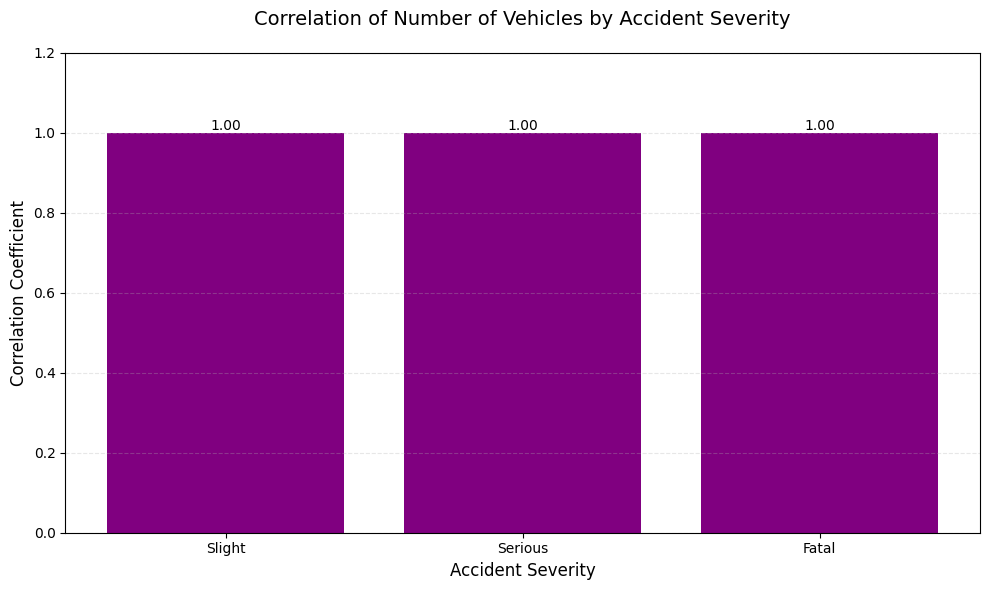

In [87]:
# Create figure
plt.figure(figsize=(10, 6))

# Data for visualization
severity_types = ['Slight', 'Serious', 'Fatal']
correlation_values = [slight_corr, serious_corr, fatal_corr]

# Create bar plot
bars = plt.bar(severity_types, correlation_values,
               color=['purple'])

# Customize the plot
plt.title('Correlation of Number of Vehicles by Accident Severity', 
         pad=20, size=14)
plt.xlabel('Accident Severity', size=12)
plt.ylabel('Correlation Coefficient', size=12)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.3)

# Set y-axis limits to better show the differences
plt.ylim(0, 1.2)

plt.tight_layout()
plt.show()

<h3>19.1: Based on my findings from the dataset, I can infer that there is a correlation with regards to Accident Severity and Number of Vehicles in each category of severity.</h3>

<h1>INSIGHT 20</h1>

<h1>20. What District Area and it's Light Level causes the most casualties?</h1>

In [82]:
casualties_area_condition = np.round(accident.groupby(['District Area','Light_Conditions'])['Number_of_Casualties'].mean(),2)

casualties_area_condition.idxmax()

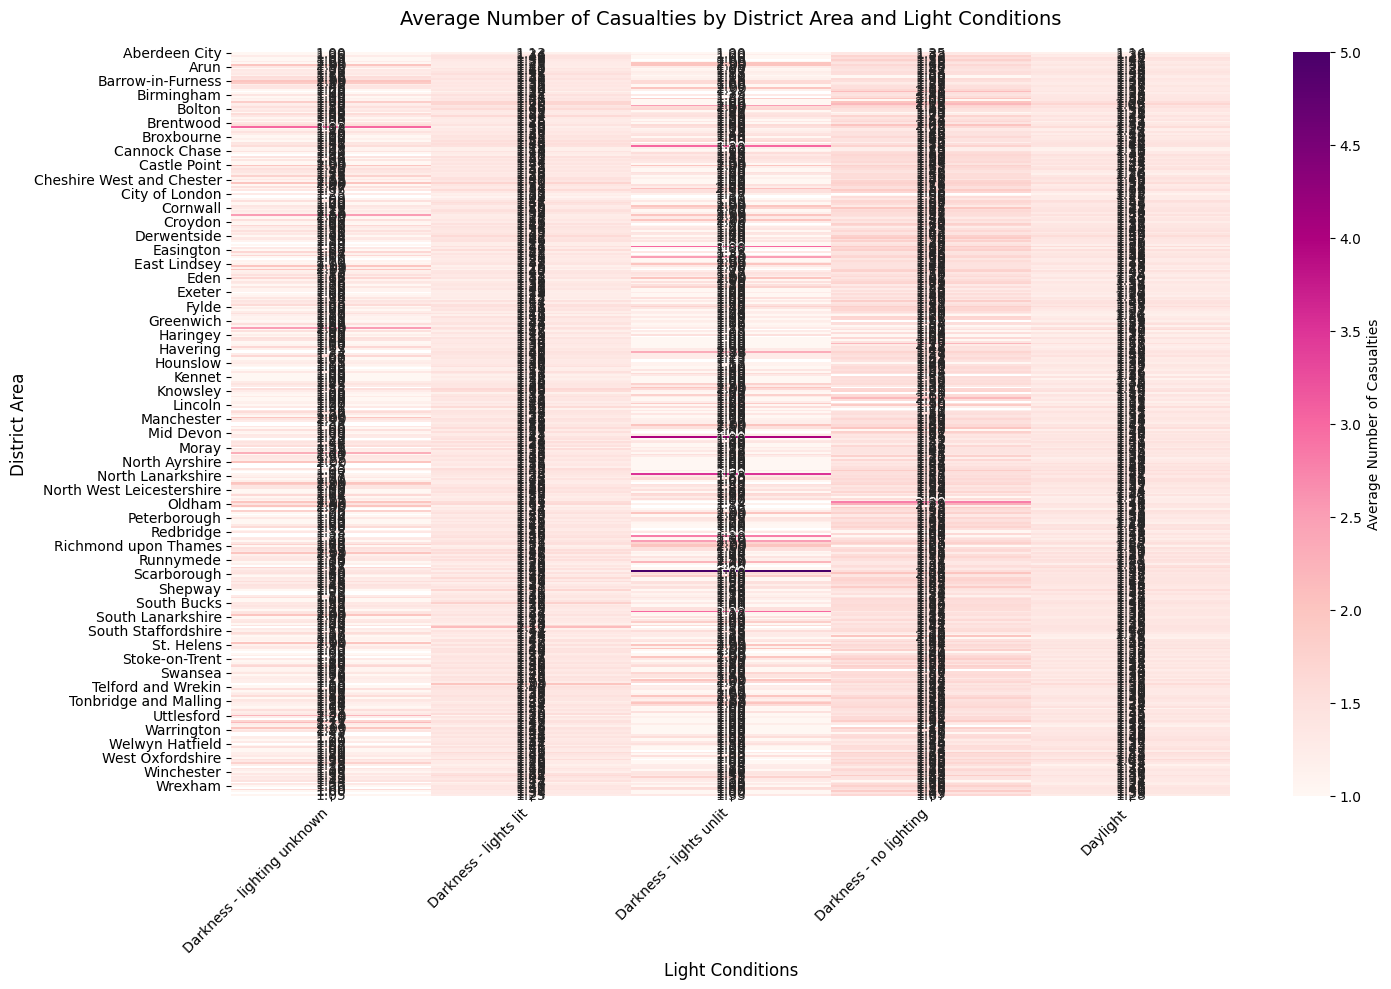

In [83]:
# Reshape the data for heatmap visualization
casualties_pivot = casualties_area_condition.unstack()

# Create figure with larger size
plt.figure(figsize=(15, 10))

# Create heatmap
sns.heatmap(casualties_pivot,
            cmap='RdPu',  # Red-Purple colormap
            annot=True,   # Show numbers in cells
            fmt='.2f',    # Format as float with 2 decimal places
            cbar_kws={'label': 'Average Number of Casualties'},
            square=False)

# Customize labels
plt.title('Average Number of Casualties by District Area and Light Conditions', pad=20, size=14)
plt.xlabel('Light Conditions', size=12)
plt.ylabel('District Area', size=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

<h3>20.1: The Salisbury area and Darkness - lights unlit conditions causes the most casulaties</h3>

<h1>INSIGHT 21</h1>

<h1>21. What is the highest average number of deaths in each Light Conditions?</h1>

In [77]:
area = accident[accident['Weather_Conditions']== 'Fine + high winds']
area2 = np.round(area.groupby(['Light_Conditions'])['Number_of_Casualties'].mean(),2)
area2

Light_Conditions
Darkness - lighting unknown    1.39
Darkness - lights lit          1.37
Darkness - lights unlit        1.47
Darkness - no lighting         1.52
Daylight                       1.37
Name: Number_of_Casualties, dtype: float64

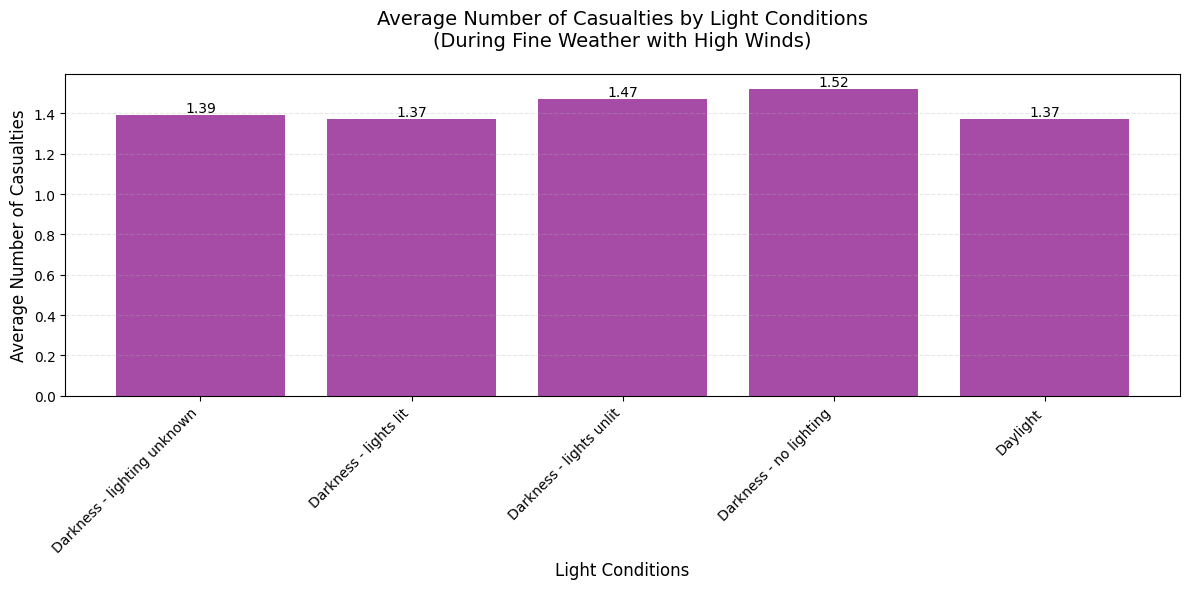

In [80]:
plt.figure(figsize=(12, 6))

# Create bar plot
bars = plt.bar(area2.index, area2.values, 
               color=['purple'],
               alpha=0.7)

# Customize the plot
plt.title('Average Number of Casualties by Light Conditions\n(During Fine Weather with High Winds)', 
         pad=20, size=14)
plt.xlabel('Light Conditions', size=12)
plt.ylabel('Average Number of Casualties', size=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

<h3>Insight 21.1: The Darkness - no lighting conditions has the highest number of deaths with an average of 1.52</h3>

<h1>INSIGHT 22 / AREA ANALYSIS</h1>

In [ ]:
area_year = accident.groupby(['District Area', "Year"]).size().reset_index(name = "Accident_Count")
pivot_table = area_year.pivot(index = 'Year', columns = 'District Area', values = 'Accident_Count')
pivot_table
                             

<h3>Insight 22.1</h3>

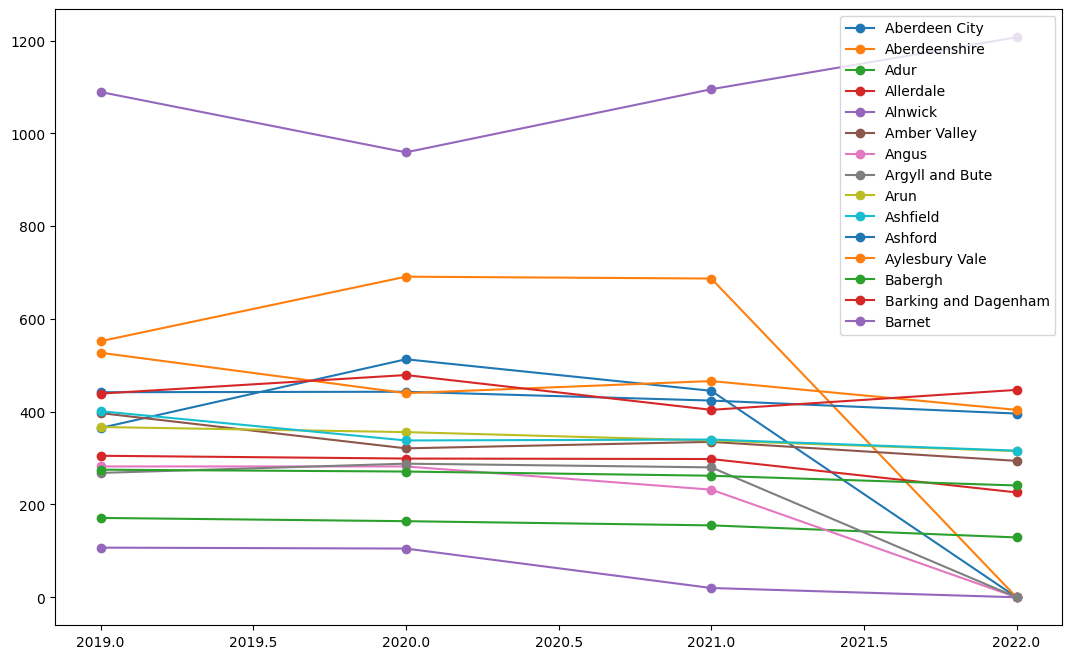

In [ ]:
count = 0 
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index, pivot_table[x], label = x , marker = 'o')
    if count == 15:
        break

plt.gcf().set_size_inches(13,8)
plt.legend()
plt.show()

<h1>INSIGHT 22 / VISUALIZING CORRELATION</h1>

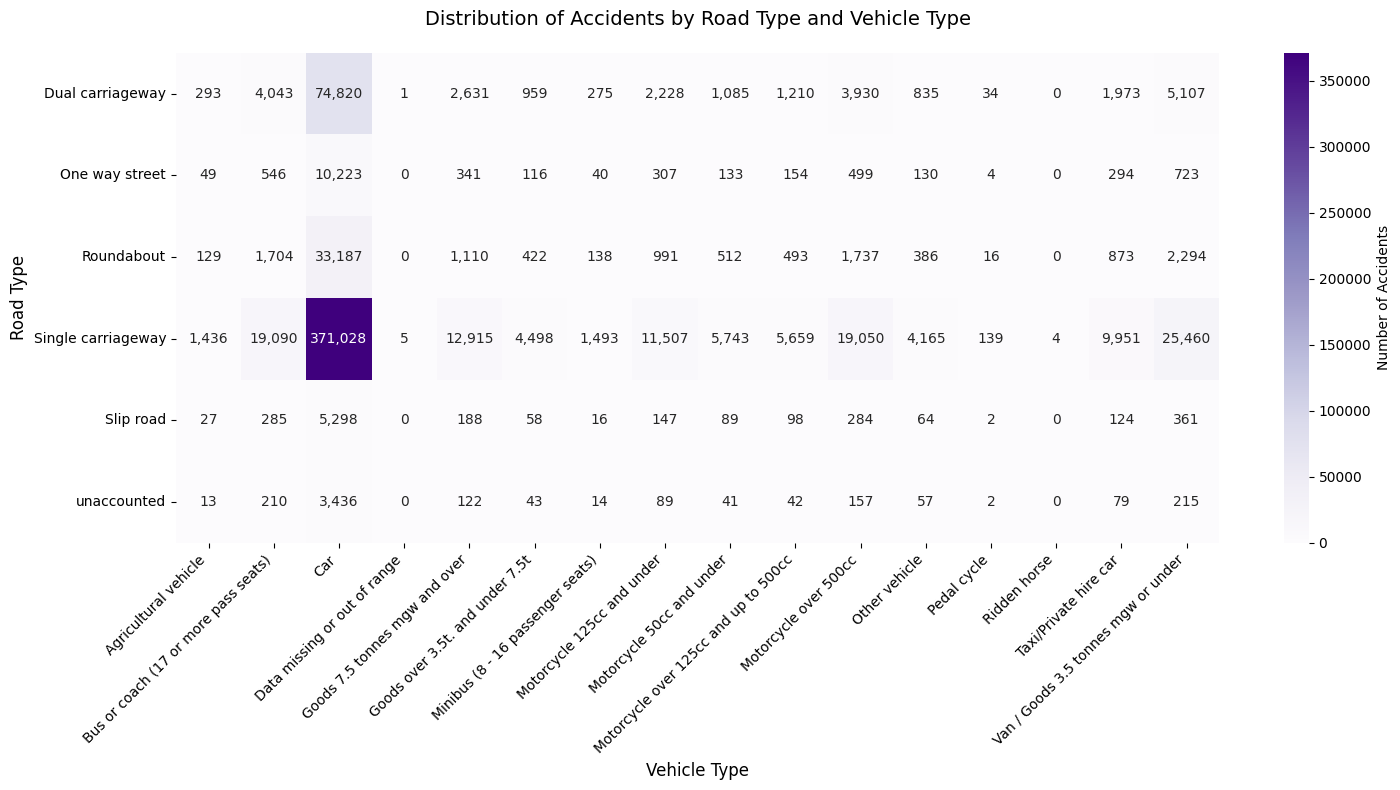

In [75]:
# Create cross-tabulation of Road Type and Vehicle Type
type_vh = accident.groupby(['Road_Type', 'Vehicle_Type']).size().unstack(fill_value=0)

# Create figure with larger size
plt.figure(figsize=(15, 8))

# Create heatmap with improved styling
sns.heatmap(type_vh, 
            cmap='Purples',        # Yellow-Orange-Red colormap
            annot=True,           # Show numbers in cells
            fmt=',d',             # Format as integer with comma separator
            cbar_kws={'label': 'Number of Accidents'},
            square=False)         # Rectangle cells for better text fit

# Customize labels
plt.title('Distribution of Accidents by Road Type and Vehicle Type', pad=20, size=14)
plt.xlabel('Vehicle Type', size=12)
plt.ylabel('Road Type', size=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()